### 유방암 데이터를 활용하여 Ensemble 모델을 학습해보자 
- winconsin 의 유방암 데이터 셋 
- 총 569 건의 데이터 
- 악성 (212), 양성(357) 으로 구성 

In [1]:
# 데이터 셋 불러오기
from sklearn.datasets import load_breast_cancer

data=load_breast_cancer()
data # 전체적인 데이터 형태는 딕셔너리, 구성요소는 넘파이 배열, 문자열 정보로 구성 => bunch 객체 

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [2]:
# 딕셔너리 구조에서 데이터 확인 : 키 값들을 확인 => keys() 
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
# 악성(212) / 양성(357) 분류에 사용되는 특성 확인 
# 학습에 사용할 데이터의 이름과 개수 확인 
print(data.feature_names)
len(data.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


30

In [5]:
# 각 특성들의 자료형 확인 
type(data.data)

numpy.ndarray

In [6]:
# 유방암 데이터 셋의 크기 확인 
data.data.shape

(569, 30)

In [7]:
# 악성과 양성의 데이터 수 확인 
# 동일한 개수로 이루어진 2 개 이상의 데이터를 연결해주는 함수 : zip() 
# zip() => 악성 : 00, 양성 : 00 
# 정답 레이블 (클래스) 이름 : target_names => 악성 or 양성 
# 범주별로 개수를 반환하는 함수 : bincount() => numpy 라이브러리 함수 

import numpy as np 
for i, j in zip(data.target_names,np.bincount(data.target)):
    print({i : j})

{'malignant': 212}
{'benign': 357}


#### 훈련데이터와 테스트데이터로 분리 

In [8]:
from sklearn.model_selection import train_test_split
# 학습용 7 : 테스트용 3 
# random_state = 7 
X_train,X_test,y_train,y_test=train_test_split(data.data,
                                               data.target,
                                               test_size=0.3,
                                               random_state=7)

In [9]:
# 데이터 크기 확인 
X_train.shape,X_test.shape,y_train.shape,y_test.shape
# 문제 : 2차원, 정답 : 1차원 

((398, 30), (171, 30), (398,), (171,))

### RandomForest 모델 적용하기
- 1. 몇 개의 트리를 만들지 선택 (n_estimators)
- 2. 단일 결정트리에서처럼 사전 가지치기를 사용 여부를 결정 

In [10]:
# 필요한 라이브러리 꺼내오기
from sklearn.ensemble import RandomForestClassifier

# 모델 생성, 하이퍼파라미터 설정 
foresst_model=RandomForestClassifier(n_estimators=45,random_state=7)

# 학습 
foresst_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=45, random_state=7)

In [11]:
# 교차검증으로 평가 
from sklearn.model_selection import cross_val_score
cross_val_score(foresst_model,X_train,y_train,cv=5).mean()

0.9598101265822784

In [12]:
# 학습 및 테스트 데이터를 이용하여 예측값 만들기 
pre_train=foresst_model.predict(X_train)
pre_test=foresst_model.predict(X_test)

# 예측 결과 확인 
print('학습 데이터를 이용한 예측 결과 : \n',pre_train)
print('테스트 데이터를 이용한 예측 결과 : \n',pre_test)

학습 데이터를 이용한 예측 결과 : 
 [1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 0 0 1
 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0
 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 1 1
 0 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1
 1 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0
 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0
 1 1 0 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0
 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 1
 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1]
테스트 데이터를 이용한 예측 결과 : 
 [1 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1

In [14]:
# 학습 및 테스트 데이터에 대한 분류 모델의 성능을 확인 => 평균 정확도 
from sklearn.metrics import accuracy_score
print('학습 데이터 정확도 : {:,.3f}'.format(accuracy_score(y_train,pre_train)))
print('테스트 데이터 정확도 : {:,.3f}'.format(accuracy_score(y_test,pre_test)))

학습 데이터 정확도 : 1.000
테스트 데이터 정확도 : 0.965


In [48]:
data.data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

#### GridSearchCV 를 적용하여 모델의 성능을 향상시키기

In [50]:
# 1. 튜닝할 하이퍼파라미터 설정
# n_estimators : [45,80,200]
# max_depth : [3,5,7]
# min_samples_split : [6,7,8]
# 2. param = {} : 하이퍼파라미터를 딕셔너리 형태로 저장 
param={'n_estimators' : [45,80,200],
      'max_depth' : [3,5,7],
      'min_samples_split' : [6,7,8,12]}

# 랜덤포레스트 모델 생성 
foresst_model2=RandomForestClassifier(random_state=7,n_jobs=-1)
# n_jobs=-1 : 내 컴퓨터의 CPU 성능을 모두 쓰겠다. 

# GridSearchCV 모델 생성
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(foresst_model2,param,cv=5,scoring='accuracy',n_jobs=-1,verbose=2)

# 학습
grid.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=7),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_split': [6, 7, 8, 12],
                         'n_estimators': [45, 80, 200]},
             scoring='accuracy', verbose=2)

In [51]:
# 가장 높은 성능일때의 최적의 하이퍼파라미터 조합 확인 
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 5, 'min_samples_split': 8, 'n_estimators': 200}
0.9573101265822783


#### 모델 완성 및 영향력 높은 특성 확인 

In [52]:
# 라이브러리 꺼내오기
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
# 랜덤포레스트 모델 완성하기 
best_model=RandomForestClassifier(max_depth=5,
                                 min_samples_split=8,
                                 n_estimators=200,
                                 random_state=7)
# 학습
best_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_split=8, n_estimators=200,
                       random_state=7)

In [55]:
# 영향력 높은 특성 추출하기 => feature_importances_
fi=best_model.feature_importances_
fi

array([0.03891047, 0.01310631, 0.05991701, 0.04007513, 0.00549043,
       0.0091513 , 0.05685913, 0.10216973, 0.00190255, 0.00346035,
       0.01464151, 0.00213909, 0.01065977, 0.03585322, 0.0015633 ,
       0.00157047, 0.00695062, 0.00543687, 0.00219929, 0.00405593,
       0.1153348 , 0.0154838 , 0.14524698, 0.08300178, 0.01087716,
       0.00958769, 0.06204617, 0.13025823, 0.00784895, 0.00420195])

In [58]:
# 영향력 높은 특성의 형태를 데이터프레임으로 만들기
# 행 : 특성명 (fearture_names), 열 : 특성의 중요도 값 (fi)
df1=pd.DataFrame(fi,index=data.feature_names,columns=['importances'])
df1

,importances
mean radius,0.038910
mean texture,0.013106
mean perimeter,0.059917
mean area,0.040075
mean smoothness,0.005490
mean compactness,0.009151
mean concavity,0.056859
mean concave points,0.102170
mean symmetry,0.001903
mean fractal dimension,0.003460


In [59]:
# 특성의 중요도를 내림차순 정렬 
df2=df1.sort_values(by='importances',ascending=False)
df2

,importances
worst perimeter,0.145247
worst concave points,0.130258
worst radius,0.115335
mean concave points,0.102170
worst area,0.083002
worst concavity,0.062046
mean perimeter,0.059917
mean concavity,0.056859
mean area,0.040075
mean radius,0.038910


<AxesSubplot:>

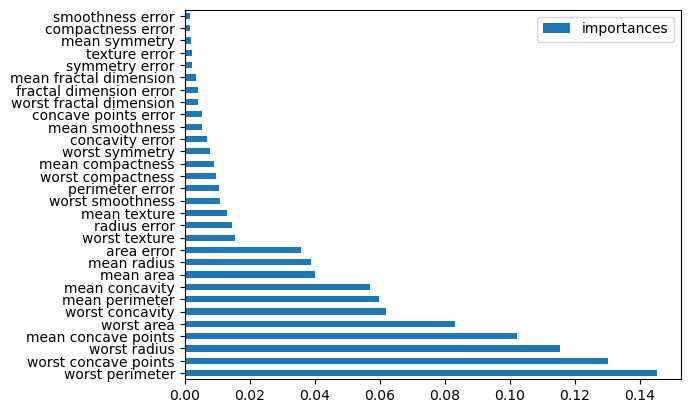

In [60]:
# 특성의 중요도를 그래프로 시각화 : bar 차트 => 수평 bar 차트 
df2.plot.barh()

### AdaBoost 모델 적용하기
- 결정트리기반
- 랜덤포레스트처럼 각각의 트리들이 독립적으로 존재하지 않음
- 사전 가지치기 파라미터를 사용할 수 없음
- learning_rate(학습용) : 가중치 갱신의 변동폭을 조정하는 값 (0 ~ 1)
    - 값이 클수록 : 과대적합 
    - 값이 작을수록 : 과소적합 

In [61]:
# 모델 불러오기
from sklearn.ensemble import AdaBoostClassifier

# 모델 생성, 하이퍼파라미터 설정
ada_model=AdaBoostClassifier(n_estimators=5,random_state=7)

# 학습
ada_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=5, random_state=7)

In [76]:
# 직접 코드 완성해서 확인해보기 
cross_val_score(ada_model,X_train,y_train,cv=5).mean()
pre_ada=ada_model.predict(X_test)
pre_ada

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0])

### GBM (Gradient Boosting Machine) 모델 적용하기 
- 여러 개의 결정트리를 묶어서 강력한 모델을 만드는 앙상블 기법
- 강력한 사전 가지치기를 적용
- 예측 성능은 높지만 학습 시간이 오래 걸리고 과대적합이 빠르게 되는 단점
- max_depth 를 작게 설정 => 5 보다 깊어지지 않게 설정하는게 좋음 

In [64]:
# 모델 라이브러리 불러오기
from sklearn.ensemble import GradientBoostingClassifier

# 모델 생성, 하이퍼파라미터 설정
gbm_model=GradientBoostingClassifier()

# 학습
gbm_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [78]:
# 직접 코드 완성해서 확인해보기 
cross_val_score(gbm_model,X_train,y_train,cv=5).mean()
pre_gbm=gbm_model.predict(X_test)
pre_gbm

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0])

### XGBoost 모델 적용하기
- 결정트리 기반의 앙상블 모델에서 가장 각광받고 있는 알고리즘 (모델) 의 하나 
- 분류에 있어서 일반적으로 다른 머신러닝 모델보다 뛰어난 성능을 나타냄 
    - GBM 기반이지만, 느린 학습시간 => Early Stoppint 기능으로 보완 
    - 과대적합의 문제 => 규제포함으로 해결 
- 대규모 머신러닝 문제에 GBM 을 적용하려면 XGBoost 를 사용 

In [66]:
!pip install xgboost

     --------------------------------------- 70.9/70.9 MB 13.4 MB/s eta 0:00:00


In [67]:
# 모델 라이브러리 불러오기
from xgboost import XGBClassifier

# 모델 생성, 하이퍼파라미터 설정 X 
xgb_model=XGBClassifier()

# 학습
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:

cross_val_score(ada_model,X_train,y_train,cv=5).mean()
pre_ada=ada_model.predict(X_test)
pre_ada

### Light GBM
- XGBoost 에 비해 가벼워 속도가 빠른 모델
- 일반적인 GBM (균형트리분할-수평) => 트리의 깊이 최소화 
    - 균형을 맞추는데 시간이 필요 
- LGBM (비대칭 트리분할 : 수직) => 속도가 빠름 
- 학습을 반복할수록 균형트리보다 예측하는 오류의 손실이 최소화 

In [72]:
!pip install lightgbm

     ---------------------------------------- 1.3/1.3 MB 11.9 MB/s eta 0:00:00


In [73]:
import lightgbm

In [75]:
from lightgbm.sklearn import LGBMClassifier

# 모델 생성, 하이퍼파라미터 설정 X 
lgbm_model=LGBMClassifier()

# 학습 
lgbm_model.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 241, number of negative: 157
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000304 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3972
[LightGBM] [Info] Number of data points in the train set: 398, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.605528 -> initscore=0.428551
[LightGBM] [Info] Start training from score 0.428551
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

LGBMClassifier()

In [ ]:
# 직접 코드 완성해서 확인해보기 